In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import warnings
warnings.filterwarnings('ignore')

In [526]:
data = pd.read_csv('diabetes.csv')

In [527]:
data.shape

(768, 9)

In [528]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking Null Values

<AxesSubplot:>

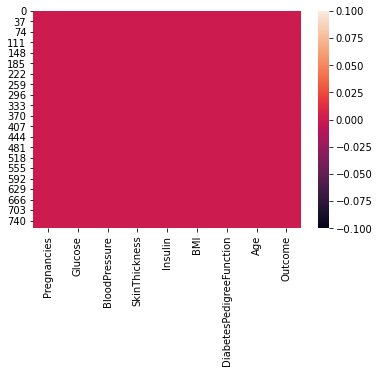

In [529]:
sns.heatmap(data.isnull())

Correlation

<AxesSubplot:>

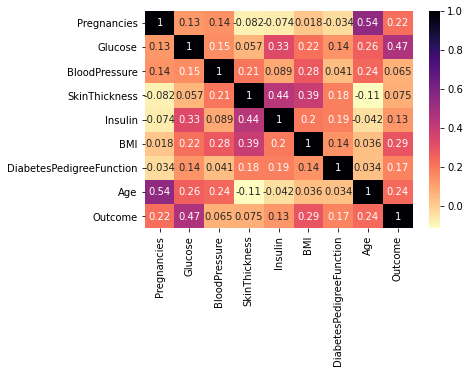

In [495]:
sns.heatmap(data.corr(), annot = True, cmap = 'magma_r')

Data Representation

In [496]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in features:
    px.histogram(data, x = data[column], color = 'Outcome').show()


Outlier Detection

In [497]:
for column in features:
    px.box(data, x = data[column], color = 'Outcome').show()

Removing Zero Values

In [498]:
data_0 = data[data['Outcome'] == 0]
data_1 = data[data['Outcome'] == 1]

In [499]:
new_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in new_features:
    data_0[column] = data_0[column].replace(0, np.nan)

for column in new_features:
    data_1[column] = data_1[column].replace(0, np.nan)

for column in new_features:
    data_0[column] = data_0[column].replace(np.nan, data_0[column].median())

for column in new_features:
    data_1[column] = data_1[column].replace(np.nan, data_1[column].median())

In [500]:
data = pd.concat([data_0, data_1])

Removing Extreme Outliers

In [501]:
for item in data_0['SkinThickness']:
    if item > 58:
        data_0['SkinThickness'] = data_0['SkinThickness'].replace(item, 58)

In [502]:
for item in data_0['DiabetesPedigreeFunction']:
    if item > 1.5615:
        data_0['DiabetesPedigreeFunction'] = data_0['DiabetesPedigreeFunction'].replace(item, 1.561)

In [503]:
for item in data_0['Age']:
    if item > 79:
        data_0['Age'] = data_0['Age'].replace(item, 79)

In [504]:
for item in data_1['SkinThickness']:
    if item > 54:
        data_1['SkinThickness'] = data_1['SkinThickness'].replace(item, 54)
    if item < 12:
        data_1['SkinThickness'] = data_1['SkinThickness'].replace(item, 12)

In [505]:
for item in data_1['BMI']:
    if item > 62.7:
        data_1['BMI'] = data_1['BMI'].replace(item, 62.7)

In [506]:
for item in data_1['DiabetesPedigreeFunction']:
    if item > 2.13:
        data_1['DiabetesPedigreeFunction'] = data_1['DiabetesPedigreeFunction'].replace(item, 2.13)

In [507]:
data = pd.concat([data_0, data_1])

Train and Test

In [508]:
x = data[features]
y = data['Outcome']

In [509]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler(feature_range = (0,1))
x = normalize.fit_transform(x)

In [510]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 11, shuffle=True, stratify=y)

Import Models

In [511]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

kNN Model

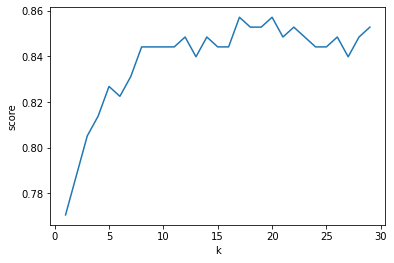

In [512]:
kNNtuning = []

for k in range(1, 30):
    kNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    kNN.fit(x_train, y_train)
    kNNtuning.append(kNN.score(x_test, y_test))

plt.plot(np.arange(1, 30), kNNtuning, label='tuning')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [513]:
kNN = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 1)
kNN.fit(x_train, y_train)
kNN_pred = kNN.predict(x_test)
acc_knn = accuracy_score(y_test, kNN_pred)

Decision Tree

In [514]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
acc_dtree = accuracy_score(y_test, dtc_pred)
joblib.dump(dtc, 'finaldtc.sav')

['finaldtc.sav']

Naive Bayes

In [515]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
acc_ganb = accuracy_score(y_test, gnb_pred)

Logistic Regression

In [516]:
logisreg = LogisticRegression()
logisreg.fit(x_train,y_train)
logi_pred = logisreg.predict(x_test)
acc_logisreg = accuracy_score(y_test, logi_pred)

Random Forest

In [517]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=11)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
acc_rf = accuracy_score(y_test, rfc_pred)

SVM

In [518]:
svmodel = svm.SVC()
svmodel.fit(x_train,y_train)
svm_pred = svmodel.predict(x_test)
acc_svc = accuracy_score(y_test, svm_pred)

Comparing Accuracy

In [519]:
models = pd.DataFrame({
'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'K-Nearest Neighbors'],
'Score': [acc_logisreg, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

print(models.sort_values(by='Score', ascending=False))
px.bar(x = models['Score'], y = models['Model']).show()

                     Model     Score
3            Random Forest  0.887446
2            Decision Tree  0.870130
5      K-Nearest Neighbors  0.844156
0      Logistic Regression  0.792208
4  Support Vector Machines  0.783550
1              Naive Bayes  0.753247


Important Features for Random Forest

In [520]:
feature_importances_df = pd.DataFrame(
    {"feature": features, "importance": rfc.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df


,feature,importance
4,Insulin,0.363143
1,Glucose,0.154708
3,SkinThickness,0.145692
5,BMI,0.090584
7,Age,0.083287
6,DiabetesPedigreeFunction,0.067253
2,BloodPressure,0.048539
0,Pregnancies,0.046795


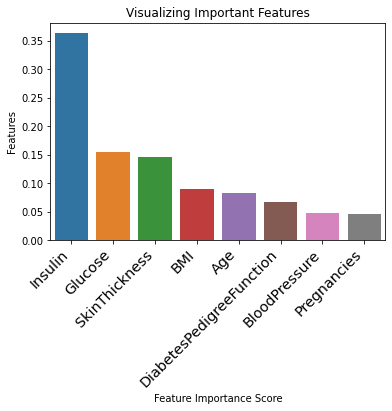

In [521]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [522]:
from sklearn.metrics import confusion_matrix, classification_report

Confusion Matrix

In [523]:
conf_mat = confusion_matrix(y_test, rfc_pred)
print(conf_mat)

[[134  16]
 [ 10  71]]


Classification Report

In [524]:
class_rep = classification_report(y_test, rfc_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       150
           1       0.82      0.88      0.85        81

    accuracy                           0.89       231
   macro avg       0.87      0.88      0.88       231
weighted avg       0.89      0.89      0.89       231

